In [4]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import nltk
#nltk.download('all')

In [7]:
np.random.seed(500)

In [8]:
#Read in CSV Datafiledata
data = "Maintenance_Text_data"
df = pd.read_csv(f"./Subsets/{data}.csv",encoding='latin-1', header=0)

In [9]:
#Replace any whitespace with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df

,Unnamed: 0,c5,c119,c78,c80,c86,c77,c79,c81,c85,...,c137,c146,c148,c150,c154,c161,c163,c183,c191,remark
0,0,19750315005389A,TAILWHEEL COCKED RIGHT PRIOR TO takeoff,AU,V,NaN,Attempt Operation Wi,Other/Miscellaneous,Pilot-In-Command,NaN,...,NaN,UNDER 12501 LBS,MONOPLANE-HIGH WING/PARA WING,POWERED,NaN,NaN,NaN,NaN,NaN,TAILWHEEL COCKED RIGHT PRIOR TO takeoff
1,1,19750419011349A,TOW PLANE BECAME AIRBORNE THEN SETTLED STUDENT...,ME,V,NaN,Fail/Incorrect Use M,Other/Miscellaneous,Pilot-In-Command,NaN,...,NaN,UNDER 12501 LBS,KITE/SAILWING,NONPOWERED,NaN,NaN,NaN,NaN,NaN,TOW PLANE BECAME AIRBORNE THEN SETTLED STUDENT...
2,2,19751029037799A,"2ND ILS APCH,aircraft'S G/S INOP LOM TUNED TO ...",AU,Z,IP,Attempt Operation Wi,Weather,Pilot-In-Command,Improper Inst Proc T,...,NaN,UNDER 12501 LBS,MONOPLANE-LOW WING,POWERED,NaN,NaN,NaN,NaN,NaN,"2ND ILS APCH,aircraft'S G/S INOP LOM TUNED TO ..."
3,3,19751209037899A,pilot NOTED SOFT right BRAKE PEDAL DRG TAXI TO...,AU,V,NaN,Attempt Operation Wi,Other/Miscellaneous,Pilot-In-Command,NaN,...,NaN,UNDER 12501 LBS,MONOPLANE-LOW WING,POWERED,NaN,NaN,NaN,NaN,NaN,pilot NOTED SOFT right BRAKE PEDAL DRG TAXI TO...
4,4,19750818025579A,TAXI OFF HARD SFC DUE TFC right MAIN GR BROKE ...,AF,H,NaN,Improper Maintenance,Hidden Hazardous Obj,Pilot-In-Command,NaN,...,NaN,UNDER 12501 LBS,MONOPLANE-HIGH WING/PARA WING,POWERED,NaN,NaN,NaN,NaN,NaN,TAXI OFF HARD SFC DUE TFC right MAIN GR BROKE ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,2743,20080227010559I,aircraft RELOCATED TO NEW HANGAR TO CHECK SIZE...,II,V,NaN,Inadequate Insp Of A,Other/Miscellaneous,Pilot-In-Command,NaN,...,NaN,UNDER 12501 LBS,MONOPLANE-LOW WING,POWERED,NaN,NaN,NaN,NaN,NaN,aircraft RELOCATED TO NEW HANGAR TO CHECK SIZE...
2744,2744,20080223013919I,ON 2/23/08 APPROXIMATELY 2130 DURING TAXI AT ...,AF,V,NaN,Improper Maintenance,Other/Miscellaneous,Airport Supervisory,NaN,...,NaN,UNDER 12501 LBS,MONOPLANE-LOW WING,POWERED,UNDER 750 HP,NaN,NaN,NaN,NaN,ON 2/23/08 APPROXIMATELY 2130 DURING TAXI AT ...
2745,2745,20080226013819I,PILOT TOOK OFF FOR LEESBURG AIRPORT AND WHILE ...,II,V,56,Inadequate Insp Of A,Other/Miscellaneous,Pilot-In-Command,5610,...,NaN,UNDER 12501 LBS,MONOPLANE-MID WING,POWERED,UNDER 750 HP,NaN,NaN,NaN,NaN,PILOT TOOK OFF FOR LEESBURG AIRPORT AND WHILE ...
2746,2746,20080702843529I,OWNER FORGOT TO FASTEN THE LOWER LEFT CAMLOCKS...,II,V,71,Inadequate Insp Of A,Other/Miscellaneous,Pilot-In-Command,7110,...,NaN,UNDER 12501 LBS,MONOPLANE-LOW WING,POWERED,UNDER 750 HP,Declared Emergency,NaN,NaN,NaN,OWNER FORGOT TO FASTEN THE LOWER LEFT CAMLOCKS...


In [10]:
na_count = df.isna().sum()
shape = df.shape[0]
print(shape)
na_count.to_csv(f'./NaN_Counts/{data}NaCount.csv')
print(len(df.columns))
total = shape
acceptable_pct_100 = total
acceptable_pct_90 = total * .9
acceptable_pct_80 = total * .8
acceptable_pct_70 = total * .7
acceptable_pct_60 = total * .6
acceptable_pct_50 = total * .5
acceptable_pct_40 = total * .4
acceptable_pct_30 = total * .3
acceptable_pct_20 = total * .2
acceptable_pct_10 = total * .1
acceptable_pct_0 = 0
acceptable_columns = {
    '100': [],
    '90': [],
    '80': [],
    '70': [],
    '60': [],
    '50': [],
    '40': [],
    '30': [],
    '20': [],
    '10': [],
    '0': [],
    'full': []
}
for column in df.columns:
    column_counts = df[column].value_counts()
    na_count = df[column].isna().sum()
    na_series = pd.Series([na_count], index=['NaN'])  
    column_counts = column_counts.append(na_series) 
    column_counts.to_csv(f'./individualColumns/{0}.csv'.format(column))
    if na_count == acceptable_pct_100:
        acceptable_columns['100'].append(column)
    elif na_count > acceptable_pct_90:
        acceptable_columns['90'].append(column)
    elif na_count > acceptable_pct_80:
        acceptable_columns['80'].append(column)
    elif na_count > acceptable_pct_70:
        acceptable_columns['70'].append(column)
    elif na_count > acceptable_pct_60:
        acceptable_columns['60'].append(column)
    elif na_count > acceptable_pct_50:
        acceptable_columns['50'].append(column)
    elif na_count > acceptable_pct_40:
        acceptable_columns['40'].append(column)
    elif na_count > acceptable_pct_30:
        acceptable_columns['30'].append(column)
    elif na_count > acceptable_pct_20:
        acceptable_columns['20'].append(column)
    elif na_count > acceptable_pct_10:
        acceptable_columns['10'].append(column)
    elif na_count > acceptable_pct_0:
        acceptable_columns['0'].append(column)
    elif na_count == acceptable_pct_0:
        acceptable_columns['full'].append(column)
#print(df.describe())
#print(len(acceptable_columns), acceptable_columns)
total_columns_in_dict = 0
for key, value in acceptable_columns.items():
    print(key,' : ',len(value))
    total_columns_in_dict += len(value)

2748
35


/tmp/ipykernel_3315127/267188076.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  column_counts = column_counts.append(na_series)
/tmp/ipykernel_3315127/267188076.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  column_counts = column_counts.append(na_series)
/tmp/ipykernel_3315127/267188076.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  column_counts = column_counts.append(na_series)
/tmp/ipykernel_3315127/267188076.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  column_counts = column_counts.append(na_series)
/tmp/ipykernel_3315127/267188076.py:36: FutureWarning: The series.append method is deprecated and will b

100  :  0
90  :  4
80  :  3
70  :  1
60  :  2
50  :  0
40  :  2
30  :  1
20  :  0
10  :  0
0  :  12
full  :  10


/tmp/ipykernel_3315127/267188076.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  column_counts = column_counts.append(na_series)
/tmp/ipykernel_3315127/267188076.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  column_counts = column_counts.append(na_series)
/tmp/ipykernel_3315127/267188076.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  column_counts = column_counts.append(na_series)


In [11]:
acceptable_columns['90']

['c97', 'c135', 'c137', 'c163']

In [15]:
# Step: Remove all columns but 0-10% empty
#acceptable_columns['0']

df = pd.read_csv(f'./Original_Datasets/{data}.csv',encoding='latin-1', header=0)
for col in df.columns:
    if col in acceptable_columns['0']:
        pass
    elif col in acceptable_columns['full']:
        pass
    elif col == 'c77' or col == 'c78':
        pass
    else:
        df.drop(inplace = True, columns=col)

#replace column names
df.to_csv(f'./Processed_Datasets/{data}.csv')

FileNotFoundError: [Errno 2] No such file or directory: './Original_Datasets/Maintenance_Text_data.csv'

In [ ]:
Main = pd.read_csv(f"./Original_Datasets/Concatenated_Orig_data.csv",encoding='latin-1', header=0)
Title = pd.read_csv("./Original_Datasets/Afilelayout.csv",encoding='latin-1', header=0)

count = 0
for key in Title['columnname']:
    count += 1
    if key in Main:
        Main.rename(columns={key : Title['description'][count-1]}, inplace=True)

Main.drop(inplace = True, columns='Unnamed: 0')
Main.to_csv(f'./Original_Datasets/Concatenated_Orig_data_renamed.csv')

In [10]:
Main.shape[0]


215308

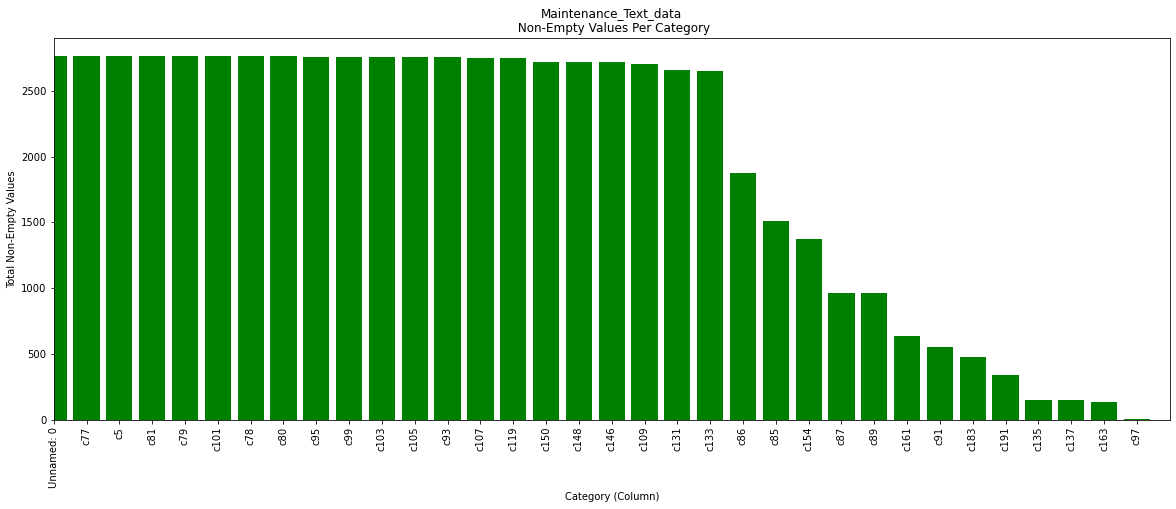

In [13]:
dataFile = f'./NaN_Counts/{data}NaCount.csv'
totalRows = shape
outputFile = f'./Histograms/{data}_histogram.png'

stuff = pd.read_csv(dataFile)
df = pd.DataFrame(stuff)
df.columns = ['Value','Count']

df['Count'] = df['Count'].apply(lambda x: (totalRows - x))

df = df.sort_values(by='Count', ascending=False)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

plt.bar(X, Y, color='g')
plt.title(f'{data}\n Non-Empty Values Per Category')
plt.xlabel('Category (Column)')
plt.ylabel('Total Non-Empty Values')

plt.subplots_adjust(bottom=.35)

# rotate x labels
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 90)

plt.xlim([0,len(list(df.iloc[:,1]))])

figure = plt.gcf() # get current figure
figure.set_size_inches(20, 10)
figure.savefig(outputFile, dpi = 1200)